# **Neural Networks implemented in Python's Tensor flow**

## **Part 3, our First Neural Networks:**

### **Section 1, Learn the Dataset:**

    Lets import our stuff again

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras # type: ignore
from tensorflow import keras
from tensorflow.keras import layers # type: ignore
import tensorflow.compat.v2.feature_column as fc # type: ignore
import tensorflow.compat.v1 as tf1 # type: ignore

    Our dataset for today is the fassion dataset from keras, imported as follows

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split test & train
train_images.shape

(60000, 28, 28)

    As we can see our dataset appears to be 60,000 images of 28*28 pixels
    So lets snoop 1 of these pixels

In [4]:
train_images[0,23,23]

194

    Hmm, 194? that doesn't mean much, lets try this:

In [5]:
print(train_images[15:16])

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  85 188 146
    79   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 140 202 199
   255 144   0   0   0   0  11 135 157   5   0]
  [  0   0   0   0   0   0   0   0   0   0   0   3   0   0 200 187 200
   191 255  51   0   0  16 208 227 236  63   0]
  [  0   0   0   0   0   0   0   0   0   0   0  

    So from this we can conclude each one is a B/W pixel from 0 to 255 - & the edges have white pixels

    Lets finally take a peek at an image

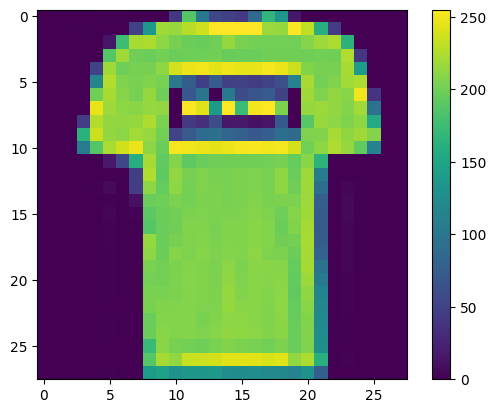

In [6]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

    Visible shape right here^^

    Now we can use this to classify it into 1 of 9 classes

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    Lets normalize the data on 0 <= x <= 1 instead of 0 <= x <= 255

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

### **Section 2, Build our first proper Neural Network:**

    Now we can build our first NN model

    This code block will define the models architecture:
    What's happening here is:
        laters.flatten will reshape the 28*28 into a 1*784
        & layers.dense will build our hidden layers

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])



C:\Users\samia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


    Now that we have defined the layers & the type of model, we can compile it

    The next step is to add an optimizer, a loss, & a metric

In [17]:
model.compile(  optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'] )

    The setup is done, we can now use the model object to begin the training

In [18]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7790 - loss: 0.6359
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8618 - loss: 0.3859
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8761 - loss: 0.3381
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8866 - loss: 0.3096
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8882 - loss: 0.2972
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8954 - loss: 0.2820
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9016 - loss: 0.2681
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9030 - loss: 0.2597
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9076 - loss: 0.2460
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9112 - loss: 0.2368
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9114 - loss: 0.2326
Epoch 12/20
1875/1875 ━━━━━━━━

    During each Epoch the accuracy goes up & loss goes down - which looks nice
    
    Except when we go to test it

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print("Test Accuracy: ", test_acc); print("Test Loss: ", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - accuracy: 0.8822 - loss: 0.3651
Test Accuracy:  0.8827000260353088
Test Loss:  0.3634032607078552


    We get much less Accuracy & much less Loss

    What happened? Overfit

    & while fixing it is far from a solved problem, we can mess around by fixing parameters & seeing if that helps us out

### **Section 3, Optimize our Neural Network:**

    we will do this mathematically by taking multiple sample pieces of data & using simple numerical analysis to find the local maximum accuracy

In [32]:

#5 models with 10 epochs & more hidden nodes

def create_model(input_shape=(28, 28), hidden_units=128, output_units=10, optimizer='adam', loss='sparse_categorical_crossentropy'):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=input_shape),  # Input layer
        keras.layers.Dense(hidden_units, activation='relu'),  # Hidden layer
        keras.layers.Dense(output_units, activation='softmax')  # Output layer
    ])
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

models = []

for i in range(5):  # Let's create 5 different models
    model = create_model(hidden_units=128 + i * 32)  # Change hidden_units for each model
    models.append(model)

# Train each model
for i, model in enumerate(models):
    print(f"Training model {i}")
    model.fit(train_images, train_labels, epochs=10)

    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
    print(f"Model {i} - Test Accuracy: {test_acc}, Test Loss: {test_loss}")

    print("\n" + "="*50 + "\n")


C:\Users\samia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model 0
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7739 - loss: 0.6483
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8609 - loss: 0.3818
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8747 - loss: 0.3432
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8829 - loss: 0.3180
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8904 - loss: 0.2969
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8971 - loss: 0.2818
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9011 - loss: 0.2676
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9048 - loss: 0.2599
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9073 - loss: 0.2474
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9119 - loss: 0.2396
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - accuracy: 0.8782 - loss: 0.3571
Model 0 - Test Accuracy: 

In [33]:
accuracy = []; loss = []

for i, model in enumerate(models):
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
    # print(f"Model {i} - Test Accuracy: {test_acc}, Test Loss: {test_loss}")
    accuracy.append(test_acc); loss.append(test_loss)
    # print("\n" + "="*50 + "\n")

print(accuracy); print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.8782 - loss: 0.3571
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8813 - loss: 0.3339
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.8793 - loss: 0.3303
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.8834 - loss: 0.3442
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.8809 - loss: 0.3335
[0.8777999877929688, 0.8823000192642212, 0.8824999928474426, 0.8823999762535095, 0.8841000199317932]
[0.3543727397918701, 0.3329341411590576, 0.3250921964645386, 0.34251219034194946, 0.32394731044769287]


    Accuracy peeked at i=2, so hidden_units=128 + 2 * 32 = 192
    Time to optimize the number of Epochs

In [26]:
#5 models with 10 epochs & more hidden nodes

def create_model(input_shape=(28, 28), hidden_units=128, output_units=10, optimizer='adam', loss='sparse_categorical_crossentropy'):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=input_shape),  # Input layer
        keras.layers.Dense(hidden_units, activation='relu'),  # Hidden layer
        keras.layers.Dense(output_units, activation='softmax')  # Output layer
    ])
    
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )
    
    return model

models = []

for i in range(10):
    model = create_model()
    models.append(model)

# Train each
for i, model in enumerate(models):
    print(f"Training model {i}")
    model.fit(train_images, train_labels, epochs=(5 + (i*2)))

    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
    print(f"Model {i} - Epochs: {(5 + (i*2))} - Test Accuracy: {test_acc}, Test Loss: {test_loss}")

    print("\n" + "="*50 + "\n")

C:\Users\samia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model 0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7831 - loss: 0.6225
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8623 - loss: 0.3840
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8731 - loss: 0.3468
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8829 - loss: 0.3153
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8912 - loss: 0.2960
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - accuracy: 0.8773 - loss: 0.3359
Model 0 - Epochs: 5 - Test Accuracy: 0.8773999810218811, Test Loss: 0.34090733528137207


Training model 1
Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7817 - loss: 0.6290
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8642 - loss: 0.3779
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8762 - loss: 0.3417
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8831 - loss: 0.3146
Epoch 5/7
1875/1

In [30]:
accuracy = []; loss = []

for i, model in enumerate(models):
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
    # print(f"Model {i} - Epochs: {(5 + (i*2))} - Test Accuracy: {test_acc}, Test Loss: {test_loss}")
    accuracy.append(test_acc); loss.append(test_loss)
    # print("\n" + "="*50 + "\n")

print(accuracy); print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.8773 - loss: 0.3359
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.8708 - loss: 0.3520
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8715 - loss: 0.3625
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.8785 - loss: 0.3343
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.8850 - loss: 0.3432
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.8814 - loss: 0.3487
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.8883 - loss: 0.3443
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - accuracy: 0.8849 - loss: 0.3541
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.8901 - loss: 0.3558
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.8798 - loss: 0.3765
[0.8773999810218811, 0.8709999918937683, 0.8758999705314636, 0.8812999725341797, 0.885699987411499, 0.8837000131607056, 0.8889999985694885, 0.8849999904632568, 0.8894000053405762, 0.8805000185966492]
[0.34090733528137207, 0.35837507

    Accuracy peaked at i=8; Epochs = (5 + (8*2)) = 21

    From here on we can micro optimize, & we can change things like the optimizer or activation function to search for more accuracy
    However, any more tuning is beyond the scope of this exercise - so lets build a model with what we have

In [35]:
final_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(192, activation='relu'), # 192
    keras.layers.Dense(10, activation='softmax')
])

final_model.compile(  optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'] )

final_model.fit(train_images, train_labels, epochs=21) # 21

test_loss, test_acc = final_model.evaluate(test_images, test_labels, verbose=1)

print("Test Accuracy: ", test_acc); print("Test Loss: ", test_loss)

C:\Users\samia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/21
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7823 - loss: 0.6184
Epoch 2/21
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8658 - loss: 0.3744
Epoch 3/21
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8797 - loss: 0.3292
Epoch 4/21
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8873 - loss: 0.3071
Epoch 5/21
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8921 - loss: 0.2904
Epoch 6/21
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8971 - loss: 0.2723
Epoch 7/21
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9030 - loss: 0.2627
Epoch 8/21
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9063 - loss: 0.2502
Epoch 9/21
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9109 - loss: 0.2376
Epoch 10/21
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9131 - loss: 0.2298
Epoch 11/21
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9164 - loss: 0.2227
Epoch 12/21
1875/1875 ━━━━━━━━

    We're still acutely over-fitted, but 94% on training data & 89.2% on testing data isn't bad at all

### **Section 4, Using our Neural Network to make predictions:**

    We can predict for our test images using:

In [37]:
predictions = final_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


    And for our first test we get:

In [38]:
print(predictions[0])

[2.9308202e-11 6.8376941e-18 3.6829758e-12 2.0485645e-19 6.1810514e-15
 5.1127172e-06 4.8982977e-14 2.5331200e-04 4.5186802e-11 9.9974161e-01]


    Lets make it pretty

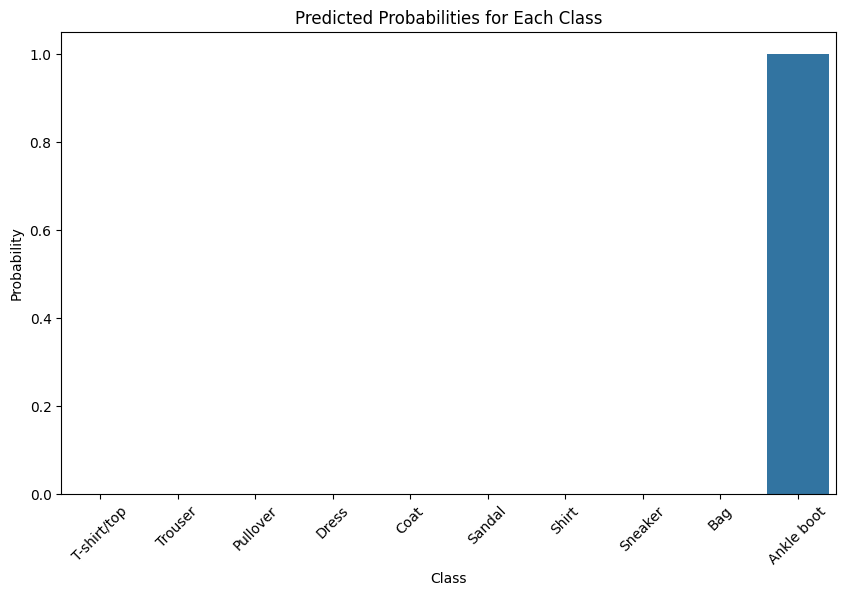

In [39]:
SNSdf = pd.DataFrame({
    'Class': class_names,
    'Probability': predictions[0]
})

# Plot the bar chart using sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Probability', data=SNSdf)
plt.title('Predicted Probabilities for Each Class')
plt.xlabel('Class')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.show()

    Open & shut case

    lets do another:

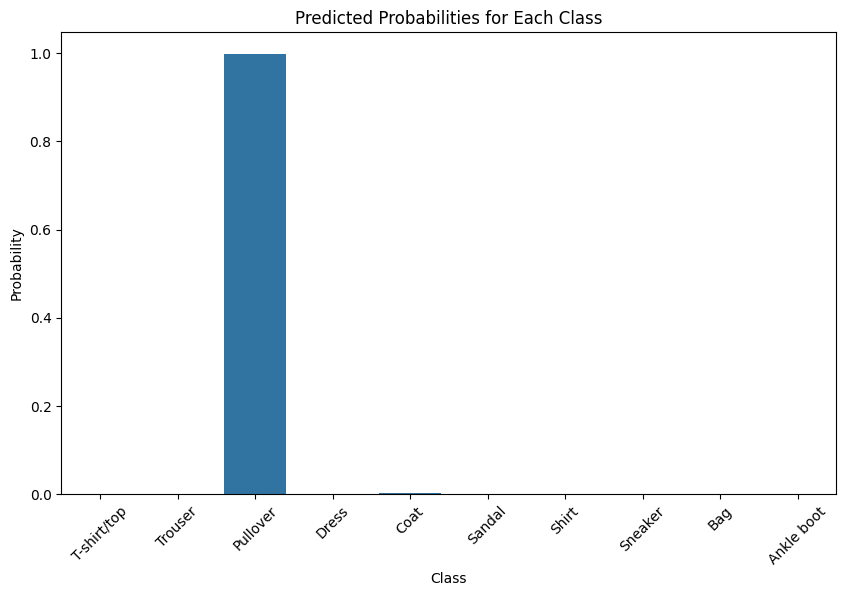

In [41]:
SNSdf = pd.DataFrame({ 'Class': class_names, 'Probability': predictions[1] })
plt.figure(figsize=(10, 6)); sns.barplot(x='Class', y='Probability', data=SNSdf); plt.title('Predicted Probabilities for Each Class')
plt.xlabel('Class'); plt.ylabel('Probability'); plt.xticks(rotation=45); plt.show()

    Less certain since it could be a coat, but its sure its a Pullover

    Lets try 1 more:

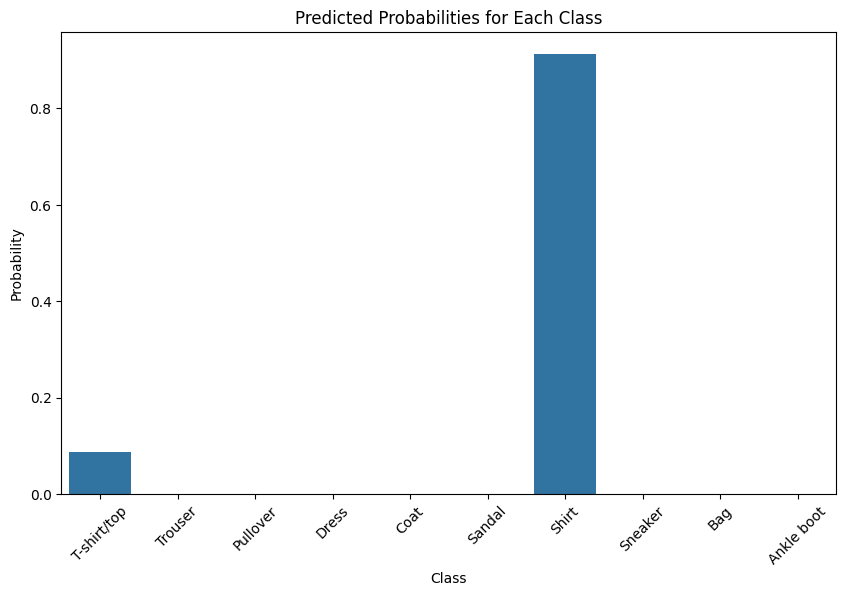

In [44]:
SNSdf = pd.DataFrame({ 'Class': class_names, 'Probability': predictions[4] })
plt.figure(figsize=(10, 6)); sns.barplot(x='Class', y='Probability', data=SNSdf); plt.title('Predicted Probabilities for Each Class')
plt.xlabel('Class'); plt.ylabel('Probability'); plt.xticks(rotation=45); plt.show()

    Uncertain again - but to be fair T's & regular shirts look nearly the same even to humans